In [1]:
from google.colab import files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
df = pd.read_csv("cleaned_ebay_deals.csv")

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extract hour for time-based analysis
df["hour"] = df["timestamp"].dt.hour

# Display first few rows
df.head()

,timestamp,title,price,original_price,shipping,item_url,discount_percentage,hour
0,2025-03-21 23:40:07,Microsoft Xbox Series S,299.00,299.00,NaN,https://www.ebay.com/itm/266190900217?_trkparm...,0.0,23
1,2025-03-21 23:40:07,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,674.99,674.99,NaN,https://www.ebay.com/itm/166613095133?_trkparm...,0.0,23
2,2025-03-21 23:40:07,Google Pixel 8 Pro 128GB Factory Unlocked - Ex...,434.99,434.99,NaN,https://www.ebay.com/itm/226348022590?_trkparm...,0.0,23
3,2025-03-21 23:40:07,Apple Macbook Air MLY33LL/A 2022 M2 - Magsafe ...,650.00,650.00,NaN,https://www.ebay.com/itm/166206685749?_trkparm...,0.0,23
4,2025-03-21 23:40:07,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,159.95,159.95,NaN,https://www.ebay.com/itm/185698601733?_trkparm...,0.0,23


<ipython-input-3-23b9389130cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["hour"], palette="coolwarm")


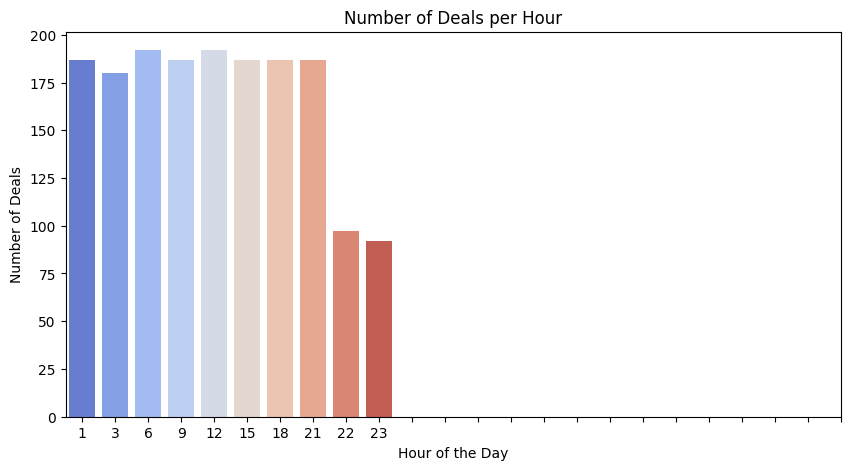

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["hour"], palette="coolwarm")
plt.title("Number of Deals per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.xticks(range(0, 24))
plt.show()


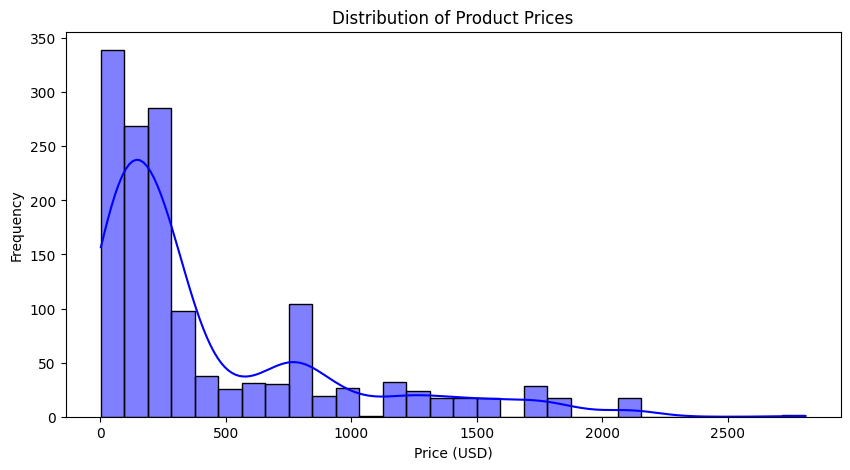

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


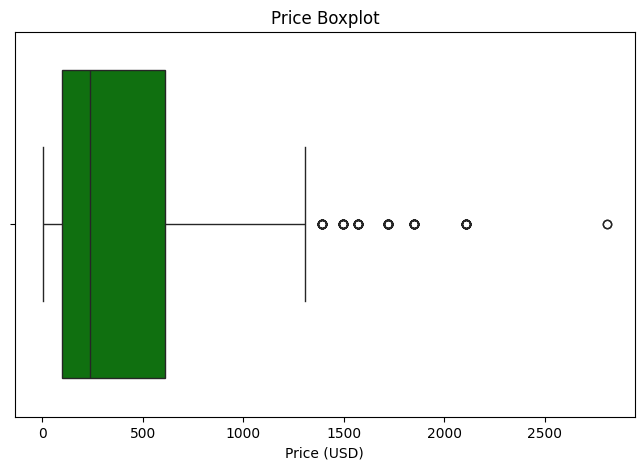

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["price"], color="green")
plt.title("Price Boxplot")
plt.xlabel("Price (USD)")
plt.show()


<ipython-input-6-25b6c29c15d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["shipping"], order=df["shipping"].value_counts().index, palette="magma")


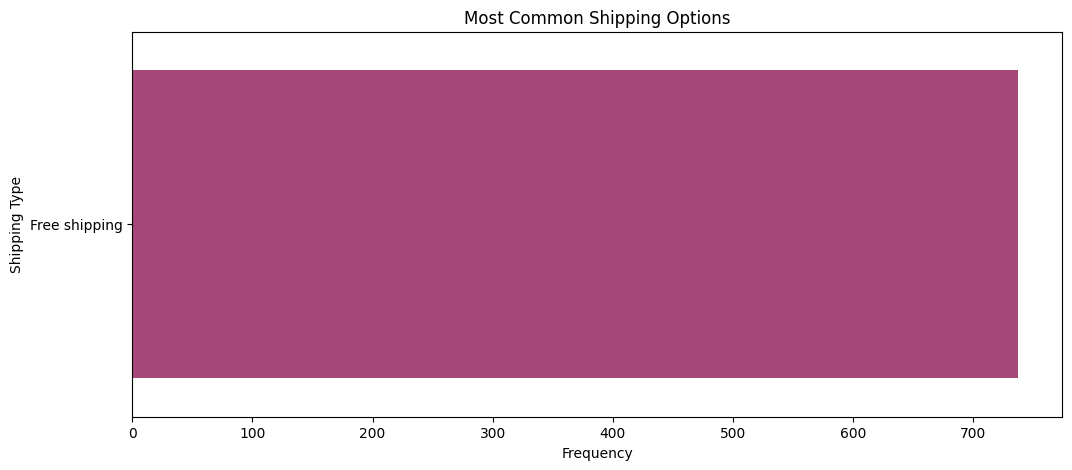

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(y=df["shipping"], order=df["shipping"].value_counts().index, palette="magma")
plt.title("Most Common Shipping Options")
plt.xlabel("Frequency")
plt.ylabel("Shipping Type")
plt.show()


<ipython-input-8-3309c52db72d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette="viridis")


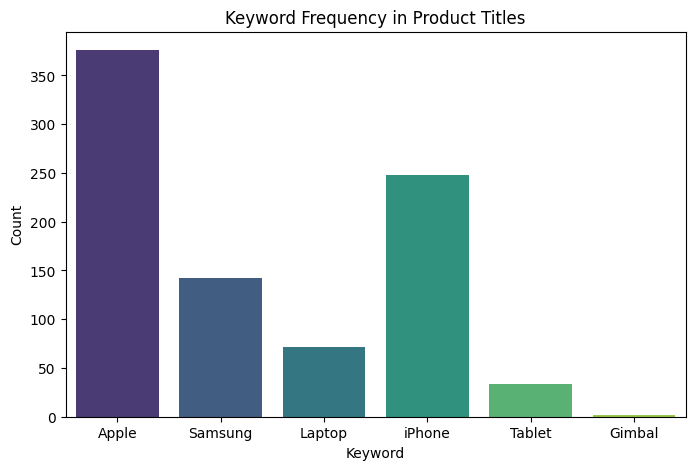

In [8]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]
keyword_counts = {word: df["title"].str.contains(word, case=False, na=False).sum() for word in keywords}

plt.figure(figsize=(8,5))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette="viridis")
plt.title("Keyword Frequency in Product Titles")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()


In [10]:
df["price_difference"] = df["original_price"] - df["price"]

df[["title", "original_price", "price", "price_difference"]].head()


,title,original_price,price,price_difference
0,Microsoft Xbox Series S,299.00,299.00,0.0
1,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,674.99,674.99,0.0
2,Google Pixel 8 Pro 128GB Factory Unlocked - Ex...,434.99,434.99,0.0
3,Apple Macbook Air MLY33LL/A 2022 M2 - Magsafe ...,650.00,650.00,0.0
4,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,159.95,159.95,0.0


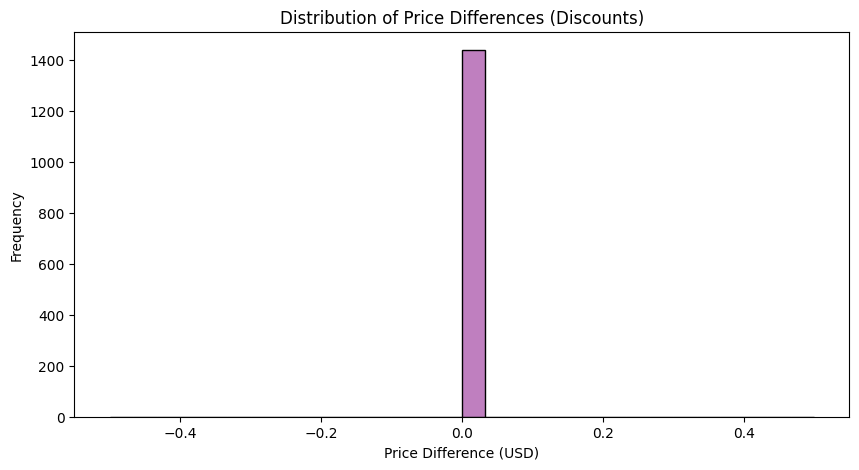

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["price_difference"], bins=30, kde=True, color="purple")
plt.title("Distribution of Price Differences (Discounts)")
plt.xlabel("Price Difference (USD)")
plt.ylabel("Frequency")
plt.show()


In [12]:
top_discounts = df.sort_values(by="discount_percentage", ascending=False).head(5)

top_discounts[["title", "original_price", "price", "discount_percentage", "price_difference"]]


,title,original_price,price,discount_percentage,price_difference
1687,"Acer PM161Q 15.6"" Monitor LCD Display 60Hz 192...",59.99,59.99,0.0,0.0
0,Microsoft Xbox Series S,299.00,299.00,0.0,0.0
1,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,674.99,674.99,0.0,0.0
2,Google Pixel 8 Pro 128GB Factory Unlocked - Ex...,434.99,434.99,0.0,0.0
3,Apple Macbook Air MLY33LL/A 2022 M2 - Magsafe ...,650.00,650.00,0.0,0.0
